<a href="https://colab.research.google.com/github/Jencinias/Ensemble-Based-Traffic-Sign-Recognition/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Todo
#Make the data analysis more clear
#Add comments
#Make a new folder for the downsampled data with the images that aren't used

In [2]:
import pandas as pd
import os
import cv2 as cv
from google.colab.patches import cv2_imshow

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Visualize the Data

In [4]:
#Using Pandas creates a dateframe with the contents of the road_sign.csv
df = pd.read_csv("/content/drive/MyDrive/road_sign.csv")

#Shows the first 5 rows of the dataframe
print(df.head())

      filename  width  height         class  xmin  ymin  xmax  ymax
0    road0.png    267     400  trafficlight    98    62   208   232
1    road1.png    400     283  trafficlight   154    63   258   281
2   road10.png    400     267  trafficlight   106     3   244   263
3  road100.png    400     385    speedlimit    35     5   363   326
4  road101.png    400     200    speedlimit   195     7   392   194


In [5]:
#Gets the count of each class in the dataframe
counts = df["class"].value_counts()

#print(counts)

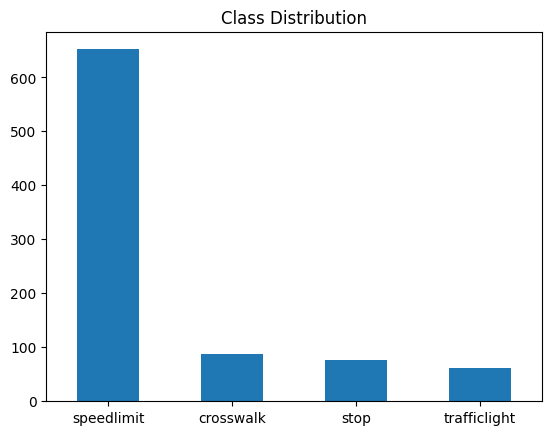

In [6]:
# create bar plot of counts
ax = counts.plot.bar(rot=0, title="Class Distribution")

In [7]:
#Gets and stores the path to the road_sign_images folder
images = os.listdir("drive/MyDrive/road_sign_images")

#print(images)

In [8]:
row = df.loc[df["filename"] == images[0]]  #Gets the row that has the same file name as the first image

#Gets each value for the coordinates to build a bounding box from that row
xmin = row["xmin"].values[0]
ymin = row["ymin"].values[0]
xmax = row["xmax"].values[0]
ymax = row["ymax"].values[0]

#creates a color and thickness that will be used to create the bounding box
color = (0,255,0)
thickness = 2

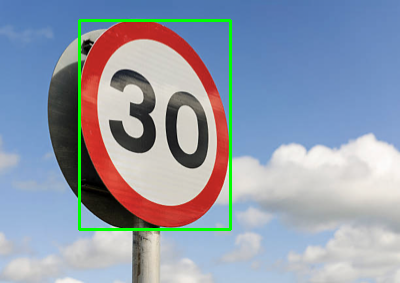

In [9]:
#Reads the first image in images
image = cv.imread(f"drive/MyDrive/road_sign_images/{images[0]}")

#Draws a rectangle using the two points from the csv file
cv.rectangle(image, (xmin, ymin), (xmax, ymax), color=color, thickness=thickness)

#Shows the image and bounding box
cv2_imshow(image)

In [10]:
print(image.shape) #checking first image size

(283, 400, 3)


# Continue exploring down sampling of the oversaturated classes.

In [11]:
#speedlimit      652
#crosswalk        88
#stop             76
#trafficlight     61

#Separates each class into its own dataframe
majority_class = df[df["class"] == counts.idxmax()]
cw_class = df[df["class"] == "crosswalk"]
stop_class = df[df["class"] == "stop"]
minority_class = df[df["class"] == counts.idxmin()]

#down samples each class to the same size as the minority class
downsampled_majority = majority_class.sample(n=int(len(minority_class)), random_state=42)
downsampled_cw = cw_class.sample(n=int(len(minority_class)), random_state=42)
downsampled_stop = stop_class.sample(n=int(len(minority_class)), random_state=42)


#print(downsampled_majority.sample(frac=1).reset_index(drop=True))
#print(downsampled_cw.sample(frac=1).reset_index(drop=True))
#print(downsampled_stop.sample(frac=1).reset_index(drop=True))

In [12]:
#Creates a new dataframe that is balanced with the new down sampled classes
balanced_df = pd.concat([downsampled_majority, downsampled_cw, downsampled_stop, minority_class])

balanced_df = balanced_df.reset_index(drop=True)   #Shuffles and resets the indexes of the new dataframe

print(balanced_df)

        filename  width  height         class  xmin  ymin  xmax  ymax
0    road862.png    300     400    speedlimit   214    29   287   101
1    road442.png    300     400    speedlimit    91   138   119   165
2    road437.png    300     400    speedlimit   165   245   201   280
3    road411.png    300     400    speedlimit   119    77   162   119
4    road232.png    300     400    speedlimit   127   221   142   234
..           ...    ...     ...           ...   ...   ...   ...   ...
239  road820.png    300     400  trafficlight    79   224    90   247
240  road822.png    300     400  trafficlight    35   308    58   352
241  road825.png    300     400  trafficlight     5   335    24   363
242  road846.png    300     400  trafficlight   208   224   228   278
243    road9.png    300     400  trafficlight    81   119   158   336

[244 rows x 8 columns]


In [13]:
#Gets the count of each class from the new balanced dataframe
counts = balanced_df["class"].value_counts()
print(counts)

speedlimit      61
crosswalk       61
stop            61
trafficlight    61
Name: class, dtype: int64


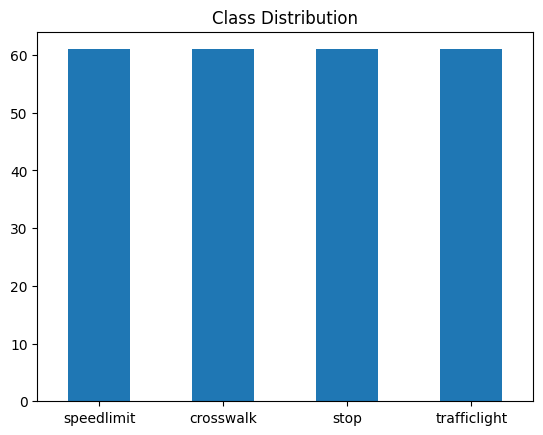

In [14]:
# create bar plot of counts
ax = counts.plot.bar(rot=0, title="Class Distribution")

In [15]:
import shutil

# Define the source and destination directories
image_dir = "drive/MyDrive/road_sign_images/"
ds_path = "drive/MyDrive/ds_folder"

# Create the dataset folder if it doesn't exist
if not os.path.exists(ds_path):
    os.mkdir(ds_path)

#creates a folder for the downsampled images
ds_images_path = "drive/MyDrive/ds_folder/ds_images"
if not os.path.exists(ds_images_path):
    os.mkdir(ds_images_path)

# Iterate through the list of images
for i in images:
    # Check if the image filename is in the balanced_df
    if i in balanced_df["filename"].values:
        # Define the path to the original image
        image_path = os.path.join(image_dir, i)

        # Define the path to save the image in the dataset folder
        ds_image_path = os.path.join(ds_images_path, i)

        # Copy the image to the dataset folder
        shutil.copy(image_path, ds_image_path)

In [16]:
#Saves the down sampled dataset to a csv in the ds_folder
ds_df_path = "drive/MyDrive/ds_folder/balanced_df.csv"
if not os.path.exists(ds_df_path):
  balanced_df.to_csv(ds_df_path)

#Image Resizing

###After looking at other images it is obivious that they are all different sizes so a standardize size will be needed.

In [18]:
min_width = df["width"].min()
min_height = df["height"].min()

max_width = df["width"].max()
max_height = df["height"].max()

print(f"Min values: {min_width}, {min_height}\nMax values: {max_width}, {max_height}.")

Min values: 254, 166
Max values: 400, 400.


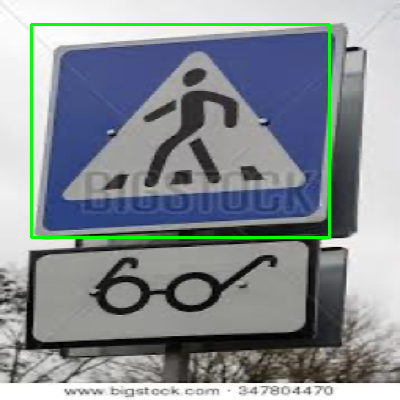

(400, 400, 3)

In [27]:
# risizing the image to 400, 400
new_width, new_height = 400, 400

#Grabs the location and reads the image from the ds_folder
ds_images = os.listdir("drive/MyDrive/ds_folder/ds_images")
image = cv.imread(f"drive/MyDrive/ds_folder/ds_images/{ds_images[0]}")

orig_height, orig_width, channels = image.shape   #Assigns the current image shape values to its corresponding variables.

#Determines what to scale the x and y bbox values by for the current image.
scale_x = new_width / orig_width
scale_y = new_height / orig_height

#Gets the row with the same filename as the current image.
row = balanced_df.loc[balanced_df["filename"] == ds_images[0]]

#Gets each value for the bbox points.
xmin = row["xmin"].values[0]
ymin = row["ymin"].values[0]
xmax = row["xmax"].values[0]
ymax = row["ymax"].values[0]

#Scales the minimum points.
trans_xmin = int(xmin * scale_x)
trans_ymin = int(ymin * scale_y)

#Scales the maximum points.
trans_xmax = int(xmax * scale_x)
trans_ymax = int(ymax * scale_y)

#Resizes image
transformed_image = cv.resize(image, (new_width, new_height))
cv.rectangle(transformed_image, (trans_xmin, trans_ymin), (trans_xmax, trans_ymax), color= color, thickness=thickness)  #Draws a bbox with the scaled values

#Displays image and shape.
cv2_imshow(transformed_image)
transformed_image.shape

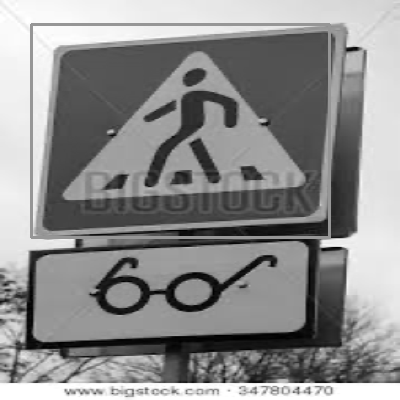

Gray Scale shape:  (400, 400) 
Original shape:  (400, 254, 3)


In [28]:
#Takes the new transformed_image and turns it into grayscale
gs_image = cv.cvtColor(transformed_image, cv.COLOR_BGR2GRAY)
cv2_imshow(gs_image)

#Prints the shape of the transformed image and the original image
print("Gray Scale shape: " ,gs_image.shape,"\nOriginal shape: ", image.shape)
